In [2]:
import boto3
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

##defining the bucket
s3 = boto3.resource('s3')
bucket_name = 'rachaeld-data445'
bucket = s3.Bucket(bucket_name)

#defining the csv file
file_key = 'MarketingData.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

marketing_data = pd.read_csv(file_content_stream)
marketing_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel
0,6623.613537,5513.093240,6019.057354,5669.568008,5898.660607,5179.234947,2
1,5642.542497,5829.866565,3960.339943,4270.020548,3498.818262,4327.423268,2
2,5292.078175,6634.370556,4444.335138,4888.286021,3265.391352,4887.560190,2
3,5595.227928,4754.860698,2977.856511,3462.490957,3609.264559,4268.641413,0
4,5126.693267,6009.649079,3811.569943,4744.115976,3829.516831,5097.491872,2


In [3]:
##obs in each channel
marketing_data['Channel'].value_counts()

0    5007
3    5002
1    5001
2    4990
Name: Channel, dtype: int64

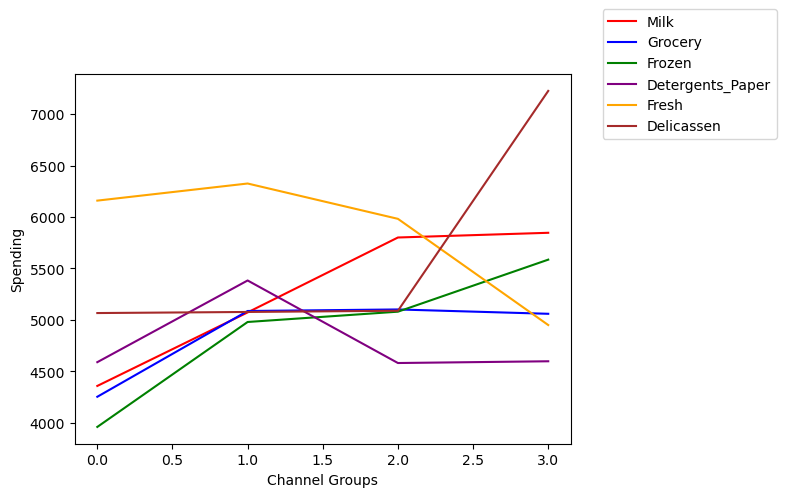

In [12]:
Channel_groups= marketing_data.groupby('Channel').mean()
plt.plot(Channel_groups.index, Channel_groups['Milk'], color = 'red')
plt.plot(Channel_groups.index, Channel_groups['Grocery'], color = 'blue')
plt.plot(Channel_groups.index, Channel_groups['Frozen'], color = 'green')
plt.plot(Channel_groups.index, Channel_groups['Detergents_Paper'], color = 'purple')
plt.plot(Channel_groups.index, Channel_groups['Fresh'], color = 'orange')
plt.plot(Channel_groups.index, Channel_groups['Delicassen'], color = 'brown')
plt.legend(labels = ['Milk', 'Grocery','Frozen', 'Detergents_Paper', 'Fresh', 'Delicassen'], bbox_to_anchor=(1.05, 1.0), loc = 'center left' )
plt.xlabel('Channel Groups')
plt.ylabel('Spending')
plt.show()

## DESCRIBE ABOVE PLOT
THE CHANNELS
• 0 → Retail
• 1 → Road Show
• 2 → Social Media
• 3 → Television

From the above plot we can see the channels and the average spending that is associated with each of these.
For most of the types there is an increase in spending as the channel increases, as seen in milk, delicassen, frozen, grocery. However for detergents paper and fresh, the average spending decreases in the higher valued channels. This makes sense vecause you are less likely to buy groceries via tv. 

<AxesSubplot: xlabel='Delicassen', ylabel='Count'>

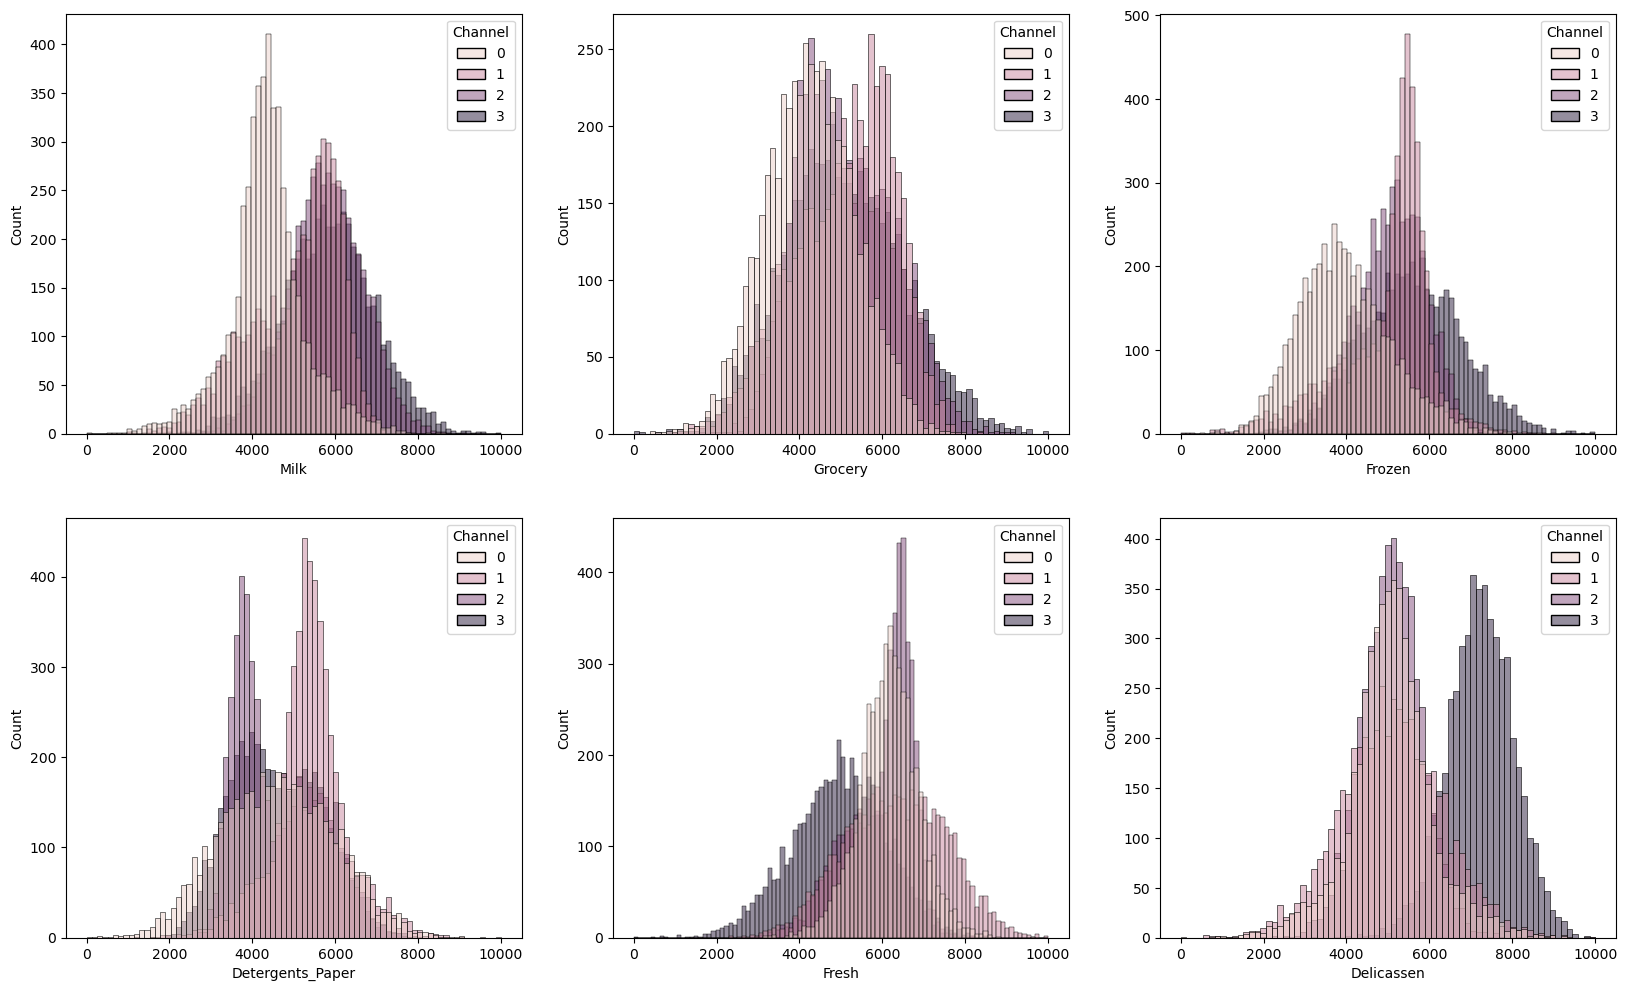

In [5]:
### MAKING ANOTHER VISUAL
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize = (20, 12))

sns.histplot(ax = axes[0, 0], x = 'Milk', hue = 'Channel', fill = True, data = marketing_data)
sns.histplot(ax = axes[0, 1], x = 'Grocery', hue = 'Channel', fill = True, data = marketing_data)
sns.histplot(ax = axes[0, 2], x = 'Frozen', hue = 'Channel', fill = True, data = marketing_data)
sns.histplot(ax = axes[1, 0], x = 'Detergents_Paper', hue = 'Channel', fill = True, data = marketing_data)
sns.histplot(ax = axes[1, 1], x = 'Fresh', hue = 'Channel', fill = True, data = marketing_data)
sns.histplot(ax = axes[1, 2], x = 'Delicassen', hue = 'Channel', fill = True, data = marketing_data)


### DESCRIBE THE PLOT ABOVE
In the plots above we see the 6 variables and the count of how much is spent with each channel. For milk we can see the spike in channel 0, which is retail. Then for Grocery we see it is pretty symmetrical for each channel being about the same. For frozen we see a spike in road show. For detergents paper the most is again channel 1 with road show. Then with fresh it is channel 2 with social media. And finally for delicassen there is an obvious peak in high prices with a lot of purchases in channel 3 which is tv, which is understandable. 
Overall the spread for all charts is 0-10000 and we can see the spread of about how much is being spent for each of the types in each channel type. 

In [6]:
## defining inputs and target
X = marketing_data.drop(columns = ['Channel'], axis = 1)
Y = marketing_data['Channel']

#splitting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, stratify = Y)

In [7]:
## ONE VS REST
one_vs_all_RF = OneVsRestClassifier(estimator = RandomForestClassifier(n_estimators = 500, max_depth = 3)).fit(X_train, Y_train)

#predicting on test
one_vs_all_RF_pred = one_vs_all_RF.predict(X_test)

print(confusion_matrix(Y_test, one_vs_all_RF_pred))
print(classification_report(Y_test,one_vs_all_RF_pred))

[[698 133 103  67]
 [ 74 644 152 130]
 [107  37 802  52]
 [ 27  30  40 904]]
              precision    recall  f1-score   support

           0       0.77      0.70      0.73      1001
           1       0.76      0.64      0.70      1000
           2       0.73      0.80      0.77       998
           3       0.78      0.90      0.84      1001

    accuracy                           0.76      4000
   macro avg       0.76      0.76      0.76      4000
weighted avg       0.76      0.76      0.76      4000



In [8]:
## ONE VS ONE 
one_vs_one_RF = OneVsOneClassifier(estimator = RandomForestClassifier(n_estimators = 500, max_depth = 3)).fit(X_train, Y_train)

#predicting on test
one_vs_one_RF_pred = one_vs_one_RF.predict(X_test)

print(confusion_matrix(Y_test, one_vs_one_RF_pred))
print(classification_report(Y_test,one_vs_one_RF_pred))

[[711 159  53  78]
 [ 54 782  22 142]
 [100 240 563  95]
 [ 21  41  11 928]]
              precision    recall  f1-score   support

           0       0.80      0.71      0.75      1001
           1       0.64      0.78      0.70      1000
           2       0.87      0.56      0.68       998
           3       0.75      0.93      0.83      1001

    accuracy                           0.75      4000
   macro avg       0.76      0.75      0.74      4000
weighted avg       0.76      0.75      0.74      4000



In [ ]:
## based on the above tests I would use One vs rest to predict the channel level, although both go back and forth on which has a better score
## with each precision, recall, f1-score, the one vs rest has a slightly higher accuracy score of .76, ccompared to .75.